Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

DATA_DIR = '/content/drive/My Drive/FDM Project Files/dataset_attrition'
import os
print("Files in DATA_DIR:", os.listdir(DATA_DIR))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in DATA_DIR: ['test.csv', 'train.csv']


CSV files into pandas

In [ ]:
import pandas as pd
import os

DATA_DIR = '/content/drive/My Drive/FDM Project Files/dataset_attrition'

train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'), low_memory=False)
test  = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'),  low_memory=False)

print("Train shape:", train.shape)
print("Test shape: ", test.shape)

Train shape: (59598, 24)
Test shape:  (14900, 24)


Inspect the data

In [ ]:
#inspect train
display(train.head())
print("Train columns:", train.columns.tolist())
print(train.info())    # types + non-null counts
print("\nAttrition distribution (train):")
print(train['Attrition'].value_counts(dropna=False))

# Repeat for test
display(test.head())
print("Test columns:", test.columns.tolist())
print(test.info())
print("\nAttrition distribution (test):")
print(test['Attrition'].value_counts(dropna=False))


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


Train columns: ['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


Test columns: ['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6 

Backup original files

In [ ]:
train.to_csv(DATA_DIR + 'train_backup.csv', index=False)
test.to_csv(DATA_DIR + 'test_backup.csv', index=False)

print("Backups saved.")

Backups saved.


**01. Checks for unnecessary columns and drops them**

Detect candidate ID / identifier columns

In [ ]:
def find_id_cols(df):
    candidates = []
    for c in df.columns:
        cn = c.lower().replace(' ', '').replace('_','')
        if cn in ('id','employeeid','empid','employee_id','employeeid'):
            candidates.append(c)
        # also check longer names that include both 'employee' and 'id'
        elif 'employee' in c.lower() and 'id' in c.lower():
            candidates.append(c)
    return candidates

id_cols_train = find_id_cols(train)
id_cols_test  = find_id_cols(test)

print("Train candidate ID columns:", id_cols_train)
print("Test candidate ID columns: ", id_cols_test)


Train candidate ID columns: ['Employee ID']
Test candidate ID columns:  ['Employee ID']


Check uniqueness & usefulness

In [ ]:
for col in id_cols_train:
    print("Train -", col, "unique count:", train[col].nunique(), "rows:", len(train),
          "is_unique?:", train[col].is_unique, "nulls:", train[col].isnull().sum())

for col in id_cols_test:
    print("Test  -", col, "unique count:", test[col].nunique(), "rows:", len(test),
          "is_unique?:", test[col].is_unique, "nulls:", test[col].isnull().sum())

Train - Employee ID unique count: 59598 rows: 59598 is_unique?: True nulls: 0
Test  - Employee ID unique count: 14900 rows: 14900 is_unique?: True nulls: 0


Save ID mappings

In [ ]:
# keep a small mapping file in case need to reference employee IDs later
if id_cols_train:
    train[id_cols_train].to_csv('train_id_mapping.csv', index=False)
if id_cols_test:
    test[id_cols_test].to_csv('test_id_mapping.csv', index=False)
print("ID mappings saved (if any).")


ID mappings saved (if any).


Drop the Employee ID columns from both sets

In [ ]:
# Column(s) to drop
cols_to_drop = ["Employee ID"]

# Drop from both train and test
train_dropped = train.drop(columns=cols_to_drop, errors='ignore').copy()
test_dropped  = test.drop(columns=cols_to_drop,  errors='ignore').copy()

print("New train shape:", train_dropped.shape)
print("New test shape: ", test_dropped.shape)

New train shape: (59598, 23)
New test shape:  (14900, 23)


In [ ]:
print("Train columns now:", train_dropped.columns.tolist())
print("Test columns now: ", test_dropped.columns.tolist())

# Save cleaned versions

train_dropped.to_csv(DATA_DIR + 'train_clean.csv', index=False)
test_dropped.to_csv(DATA_DIR + 'test_clean.csv', index=False)

print("Cleaned files saved as train_clean.csv and test_clean.csv")


Train columns now: ['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']
Test columns now:  ['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']
Cleaned files saved as train_clean.csv and test_clean.csv


**02. Check for missing values**

In [ ]:
print("Missing values in TRAIN set:")
print(train_dropped.isnull().sum()[train_dropped.isnull().sum() > 0])

print("\nMissing values in TEST set:")
print(test_dropped.isnull().sum()[test_dropped.isnull().sum() > 0])

Missing values in TRAIN set:
Series([], dtype: int64)

Missing values in TEST set:
Series([], dtype: int64)


No missing values. But adding a value handler in any case for future cases

In [ ]:
# value handler
def handle_missing(df):
    df_filled = df.copy()

    for col in df_filled.columns:
        if df_filled[col].isnull().sum() > 0:
            if df_filled[col].dtype in ['int64', 'float64']:   # numeric
                median_val = df_filled[col].median()
                df_filled[col].fillna(median_val, inplace=True)
                print(f"{col}: Filled missing with median ({median_val})")
            else:   # categorical
                mode_val = df_filled[col].mode()[0]
                df_filled[col].fillna(mode_val, inplace=True)
                print(f"{col}: Filled missing with mode ({mode_val})")

    return df_filled

train_filled = handle_missing(train_dropped)
test_filled  = handle_missing(test_dropped)


In [ ]:
# verify
print("Remaining missing in TRAIN:", train_filled.isnull().sum().sum())
print("Remaining missing in TEST :", test_filled.isnull().sum().sum())

# filled datasets
train_filled.to_csv('train_filled.csv', index=False)
test_filled.to_csv('test_filled.csv', index=False)
print("Saved train_filled.csv and test_filled.csv")

Remaining missing in TRAIN: 0
Remaining missing in TEST : 0
Saved train_filled.csv and test_filled.csv


**03. Outlier Capping**

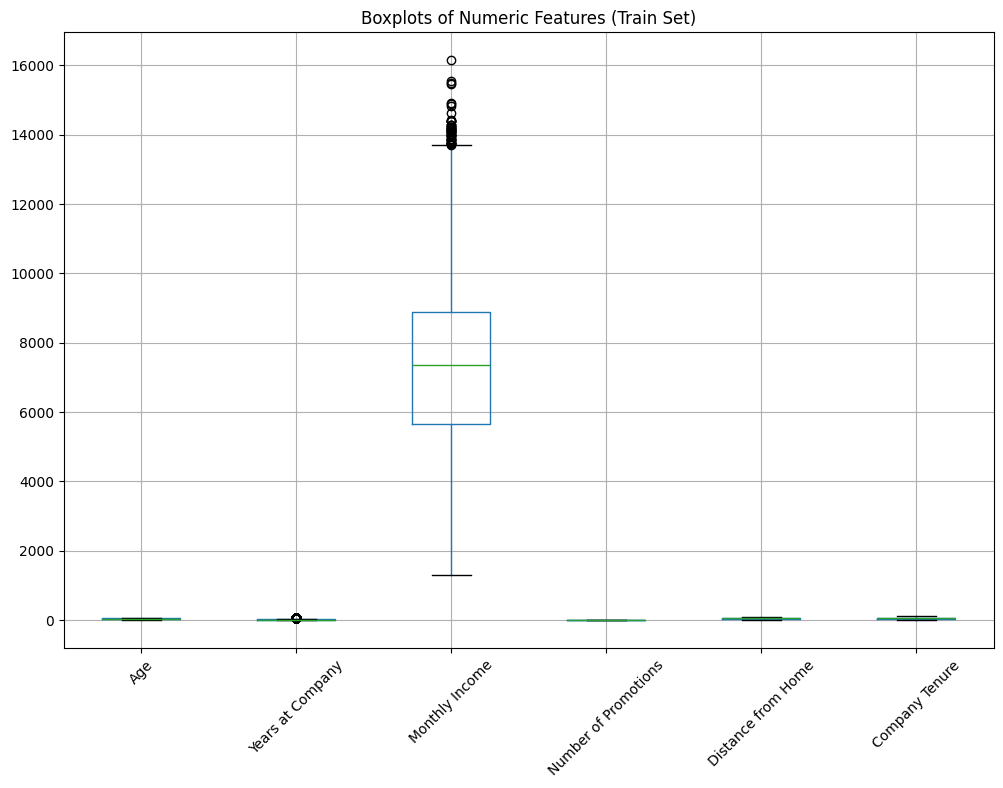

In [ ]:
import matplotlib.pyplot as plt

# Continuous numeric features (before scaling!)
numeric_features = ["Age", "Years at Company", "Monthly Income",
                    "Number of Promotions", "Distance from Home",
                    "Company Tenure"]

# Boxplots
plt.figure(figsize=(12, 8))
train_filled[numeric_features].boxplot()
plt.title("Boxplots of Numeric Features (Train Set)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Continuous numeric features
numeric_features = ["Age", "Years at Company", "Monthly Income",
                    "Number of Promotions", "Distance from Home",
                    "Company Tenure"]

# Capping thresholds from train only
caps = {}
for col in numeric_features:
    lo = train_filled[col].quantile(0.01)
    hi = train_filled[col].quantile(0.99)
    caps[col] = (lo, hi)
    train_filled[col] = train_filled[col].clip(lo, hi)
    test_filled[col]  = test_filled[col].clip(lo, hi)

print("Applied capping thresholds:", caps)

Applied capping thresholds: {'Age': (np.float64(18.0), np.float64(59.0)), 'Years at Company': (np.float64(1.0), np.float64(46.0)), 'Monthly Income': (np.float64(3134.9700000000003), np.float64(12139.089999999997)), 'Number of Promotions': (np.float64(0.0), np.float64(4.0)), 'Distance from Home': (np.float64(2.0), np.float64(98.0)), 'Company Tenure': (np.float64(7.0), np.float64(110.0))}


**04. Categorical Encoding**

uses scikit-learn ColumnTransformer
---
Ordinal Encoding
*   Work-Life Balance: Poor < Below Average < Good < Excellent
*   Job Satisfaction: Very Low < Low < Medium < High
*   Performance Rating: Low < Below Average < Average < High
*   Company Reputation: Very Poor < Poor < Good < Excellent
*   Employee Recognition: Very Low < Low < Medium < High

One-Hot Encoding

Gender, Job Role, Education Level, Marital Status, Job Level, Company Size, Remote Work, Leadership Opportunities, Innovation Opportunities


In [ ]:
# Import encoders and transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define ordinal_features list
ordinal_features = ["Work-Life Balance", "Job Satisfaction", "Performance Rating", "Company Reputation", "Employee Recognition"]

# 1. Check unique values in ordinal columns
for col in ordinal_features:
    print(col, ":", train_filled[col].unique())

Work-Life Balance : ['Excellent' 'Poor' 'Good' 'Fair']
Job Satisfaction : ['Medium' 'High' 'Very High' 'Low']
Performance Rating : ['Average' 'Low' 'High' 'Below Average']
Company Reputation : ['Excellent' 'Fair' 'Poor' 'Good']
Employee Recognition : ['Medium' 'Low' 'High' 'Very High']


In [ ]:
ordinal_categories = [
    ["Poor", "Fair", "Good", "Excellent"],           # Work-Life Balance
    ["Low", "Medium", "High", "Very High"],          # Job Satisfaction
    ["Low", "Below Average", "Average", "High"],     # Performance Rating
    ["Poor", "Fair", "Good", "Excellent"],           # Company Reputation
    ["Low", "Medium", "High", "Very High"]           # Employee Recognition
]

onehot_features = ["Gender", "Job Role", "Education Level",
                   "Marital Status", "Job Level", "Company Size",
                   "Remote Work", "Leadership Opportunities",
                   "Innovation Opportunities"]

# Build the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"), onehot_features)
    ],
    remainder="passthrough"   # keep the other columns (numerical ones)
)

In [ ]:

train_encoded = preprocessor.fit_transform(train_filled)
test_encoded  = preprocessor.transform(test_filled)

import numpy as np

# Get feature names from transformer
ohe_feature_names = preprocessor.named_transformers_["onehot"].get_feature_names_out(onehot_features)
all_feature_names = ordinal_features + list(ohe_feature_names) + [col for col in train_filled.columns if col not in ordinal_features + onehot_features]

train_encoded_df = pd.DataFrame(train_encoded, columns=all_feature_names)
test_encoded_df  = pd.DataFrame(test_encoded,  columns=all_feature_names)

print("Encoded Train Shape:", train_encoded_df.shape)
print("Encoded Test Shape: ", test_encoded_df.shape)
train_encoded_df.head()


Encoded Train Shape: (59598, 32)
Encoded Test Shape:  (14900, 32)


,Work-Life Balance,Job Satisfaction,Performance Rating,Company Reputation,Employee Recognition,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,...,Innovation Opportunities_Yes,Age,Years at Company,Monthly Income,Number of Promotions,Overtime,Distance from Home,Number of Dependents,Company Tenure,Attrition
0,3.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,31,19,5390.0,2,No,22,0,89,Stayed
1,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,59,4,5534.0,3,No,21,3,21,Stayed
2,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,24,10,8159.0,0,No,11,3,74,Stayed
3,2.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,36,7,3989.0,1,No,27,2,50,Stayed
4,1.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,56,41,4821.0,0,Yes,71,0,68,Stayed


**05. Apply Scaling**

uses StandardScaler (z-score scaling)

**each** feature has mean = 0, std = 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_features = ["Age", "Years at Company", "Monthly Income",
                    "Number of Promotions", "Distance from Home",
                    "Company Tenure"]

# Create a new ColumnTransformer that includes scaling
from sklearn.compose import ColumnTransformer

# Use the same encoders from before
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
onehot_encoder = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", ordinal_encoder, ordinal_features),
        ("onehot", onehot_encoder, onehot_features),
        ("scaler", StandardScaler(), numeric_features)
    ],
    remainder="passthrough"   # keep Attrition and any others
)


In [ ]:
# Fit on train, apply to both
train_scaled = preprocessor.fit_transform(train_filled)
test_scaled  = preprocessor.transform(test_filled)

# Convert back to DataFrames
# Get one-hot feature names
ohe_feature_names = preprocessor.named_transformers_["onehot"].get_feature_names_out(onehot_features)

# Collect all feature names
all_feature_names = (
    ordinal_features +
    list(ohe_feature_names) +
    numeric_features +
    [col for col in train_filled.columns if col not in ordinal_features + onehot_features + numeric_features]
)

import pandas as pd
train_scaled_df = pd.DataFrame(train_scaled, columns=all_feature_names)
test_scaled_df  = pd.DataFrame(test_scaled,  columns=all_feature_names)

print("Scaled train shape:", train_scaled_df.shape)
print("Scaled test shape:", test_scaled_df.shape)
train_scaled_df.head()


Scaled train shape: (59598, 32)
Scaled test shape: (14900, 32)


,Work-Life Balance,Job Satisfaction,Performance Rating,Company Reputation,Employee Recognition,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,...,Innovation Opportunities_Yes,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Company Tenure,Overtime,Number of Dependents,Attrition
0,3.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.626336,0.291243,-0.897129,1.173308,-0.985017,1.317876,No,0,Stayed
1,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.691627,-1.047966,-0.829458,2.178351,-1.020186,-1.375117,No,3,Stayed
2,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-1.205827,-0.512283,0.40413,-0.836777,-1.371877,0.723833,No,3,Stayed
3,2.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.212414,-0.780125,-1.555513,0.168266,-0.809171,-0.226635,No,2,Stayed
4,1.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.443273,2.255416,-1.164524,-0.836777,0.73827,0.486216,Yes,0,Stayed


**06. Check for class imbalance.**

In [ ]:
# Check target distribution
print("Attrition distribution (Train):")
print(train_filled["Attrition"].value_counts())
print(train_filled["Attrition"].value_counts(normalize=True))


Attrition distribution (Train):
Attrition
Stayed    31260
Left      28338
Name: count, dtype: int64
Attrition
Stayed    0.524514
Left      0.475486
Name: proportion, dtype: float64


dataset is very well balanced between the two classes. So no need to handle class imbalance.

**07. Train/Validation Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = train_scaled_df.drop(columns=["Attrition"])
y = train_scaled_df["Attrition"]

# Split into Train (80%) and Validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (47678, 31)
y_train shape: (47678,)
X_val shape: (11920, 31)
y_val shape: (11920,)


X_train.csv → Training features (80% of train)

y_train.csv → Training labels (80% of train)

X_val.csv → Validation features (20% of train)

y_val.csv → Validation labels (20% of train)

X_test.csv → Test features (no labels)

In [ ]:
import os

SAVE_DIR = "/content/drive/My Drive/FDM Project Files/splits"
os.makedirs(SAVE_DIR, exist_ok=True)

# Save X_train, y_train
X_train.to_csv(os.path.join(SAVE_DIR, "X_train.csv"), index=False)
y_train.to_csv(os.path.join(SAVE_DIR, "y_train.csv"), index=False)

# Save X_val, y_val
X_val.to_csv(os.path.join(SAVE_DIR, "X_val.csv"), index=False)
y_val.to_csv(os.path.join(SAVE_DIR, "y_val.csv"), index=False)

# Save X_test (features only, from your preprocessed/scaled test set)
X_test = test_scaled_df.drop(columns=["Attrition"], errors="ignore")
X_test.to_csv(os.path.join(SAVE_DIR, "X_test.csv"), index=False)

print("Files saved in:", SAVE_DIR)
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape)

Files saved in: /content/drive/My Drive/FDM Project Files/splits
X_train: (47678, 31) y_train: (47678,)
X_val: (11920, 31) y_val: (11920,)
X_test: (14900, 31)
